# Content
* import data
* visualization data
* train test split
* finding best k value
* KNN model

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data

In [11]:
df = pd.read_csv("heart.csv")

df.info()

print(df.isna().sum())
print("Total null values: ",df.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Total null

# 2. Data Visualization

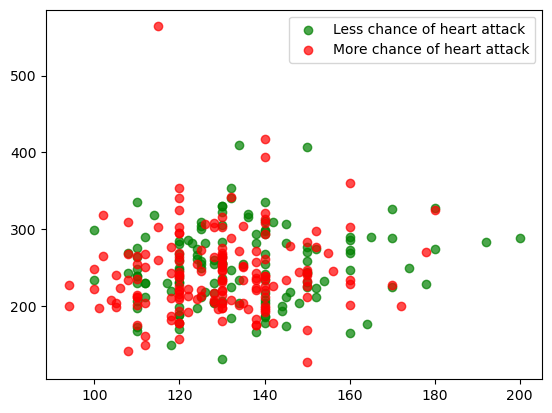

In [12]:
#  0= less chance of heart attack 1= more chance of heart attack

less_chance = df[df.output == 0]
more_chance = df[df.output == 1]

plt.scatter(less_chance.trtbps,less_chance.chol,color="green",label="Less chance of heart attack",alpha = 0.7)
plt.scatter(more_chance.trtbps,more_chance.chol,color = "red",label="More chance of heart attack",alpha = 0.7)
plt.legend()
plt.show()

In [13]:
# x and y
x_data = df.drop(["output"],axis = 1)
y = df.output.values


In [14]:
# Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


# 3. Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2,random_state = 42)


# 4. Finding Best K value

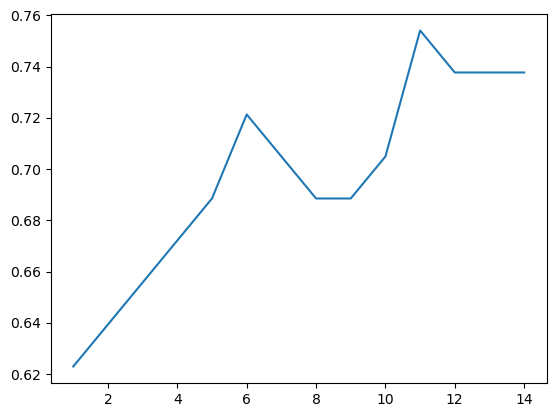

In [16]:
from sklearn.neighbors import KNeighborsClassifier

score_list = []

for i in range(1,15):
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test.values,y_test))

plt.plot(range(1,15),score_list)
plt.show()

We can see best k value in the plot, let's see in code

In [17]:

best_k = 0
for i in range(len(score_list)):
    if score_list[i] > score_list[best_k]:
        best_k = i


best_k = best_k + 1 # because score_list[0] k=1, because score_list[1] k=2,...,because score_list[n] k=n+1
print(score_list)
print(best_k)

[0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869]
11


# 5. KNN Model

In [19]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

print("{} nn Score: {} ".format(best_k,knn.score(x_test.values,y_test)))



11 nn Score: 0.7540983606557377 
